In [52]:
test = """p=0,4 v=3,-3
p=6,3 v=-1,-3
p=10,3 v=-1,2
p=2,0 v=2,-1
p=0,0 v=1,3
p=3,0 v=-2,-2
p=7,6 v=-1,-3
p=3,0 v=-1,-2
p=9,3 v=2,3
p=7,3 v=-1,2
p=2,4 v=2,-3
p=9,5 v=-3,-3"""

x_bound,y_bound = (101,103)
middle_x = x_bound // 2
middle_y = y_bound // 2

In [53]:
inp = test
inp = open('data14').read()

In [47]:
import parse

p = parse.compile("p={x},{y} v={vx},{vy}")

def parse_line(l):
    rule = p.parse(l)
    pos = (int(rule["x"]), int(rule["y"]))
    vel = (int(rule["vx"]), int(rule["vy"]))

    return pos, vel

robots = [parse_line(l) for l in inp.splitlines()]

In [48]:
len(robots)

500

In [49]:
seconds = 100
new_pos = []
quads = [0,0,0,0]
for robot in robots:
    ((x,y),(vx,vy)) = robot

    new_x = (x + (seconds * vx)) % x_bound
    new_y = (y + (seconds * vy)) % y_bound

    if new_x < middle_x: #left side
        if new_y < middle_y:
            quads[0] += 1 # top left
        if new_y > middle_y: # bottom left
            quads[1] += 1
    if new_x > middle_x: # right side
        if new_y < middle_y: # top  right
            quads[2] += 1 
        if new_y > middle_y: # bottom right
            quads[3] += 1

    new_pos.append((new_x,new_y))

ans = 1

# Loop through each value in list
for val in quads:
  
    # Multiply current result by the current value
    ans = ans * val

print(ans)
     

230435667


In [186]:
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import skew



In [257]:
metric = []
for seconds in range(1,10000):
    new_pos = []
    left = []
    right = []
    top = []
    bottom = []
    quads = [0,0,0,0]
    top_left_count = 0
    top_right_count = 0
    for robot in robots:
        ((x,y),(vx,vy)) = robot

        new_x = (x + (seconds * vx)) % x_bound
        new_y = (y + (seconds * vy)) % y_bound

        if new_x < middle_x: #left half
            left.append((middle_x - new_x,new_y))
        if new_x > middle_x: # right half
            right.append((new_x - middle_x,new_y))
        if new_y < middle_y: #top half
            top.append((new_x,middle_y - new_y))
        if new_y > middle_y: # bottom half
            bottom.append((new_x,new_y - middle_y))

        new_pos.append((new_x,new_y))

    metric.append([seconds,contiguous_points(new_pos)])

        # mean 
        # median 

        
    if (sorted(left) == sorted(right)) or (sorted(top) == sorted(bottom)):
        print(seconds)
        break
    
    #metric.append([seconds,quads])

In [262]:
sorted_metrics = sorted(metric, key=lambda x: x[-1])[::-1]

In [263]:
sorted_metrics

[[7709, 542],
 [7503, 282],
 [8315, 278],
 [3063, 274],
 [2760, 274],
 [8820, 273],
 [1548, 272],
 [9426, 271],
 [6901, 271],
 [4982, 271],
 [4825, 271],
 [4275, 271],
 [3568, 271],
 [639, 269],
 [396, 269],
 [9123, 268],
 [6699, 268],
 [6295, 267],
 [4376, 267],
 [2353, 266],
 [9628, 265],
 [7810, 265],
 [6396, 265],
 [5285, 265],
 [4516, 265],
 [3898, 264],
 [2868, 264],
 [1851, 264],
 [1043, 264],
 [9527, 263],
 [8214, 263],
 [6370, 263],
 [2255, 263],
 [9830, 262],
 [7406, 262],
 [6800, 262],
 [3366, 262],
 [7204, 261],
 [841, 261],
 [6061, 260],
 [911, 260],
 [190, 260],
 [7305, 259],
 [2558, 259],
 [2154, 259],
 [1447, 259],
 [8416, 258],
 [7507, 258],
 [5891, 258],
 [4679, 258],
 [7812, 257],
 [7002, 257],
 [6598, 257],
 [4477, 257],
 [2457, 257],
 [2147, 257],
 [134, 257],
 [8636, 256],
 [5992, 256],
 [5689, 256],
 [4174, 256],
 [3770, 256],
 [2861, 256],
 [1952, 256],
 [33, 256],
 [7103, 255],
 [5487, 255],
 [4207, 255],
 [3795, 255],
 [3669, 255],
 [2053, 255],
 [1649, 255],


In [264]:
metric = []
for seconds in range(7709,7709+1):
    new_pos = []
    left = 0
    right = 0
    top = 0
    bottom = 0
    quads = [0,0,0,0]
    top_left_count = 0
    top_right_count = 0
    for robot in robots:
        ((x,y),(vx,vy)) = robot

        new_x = (x + (seconds * vx)) % x_bound
        new_y = (y + (seconds * vy)) % y_bound
        new_pos.append((new_x,new_y))
    #metric.append([seconds,quads])

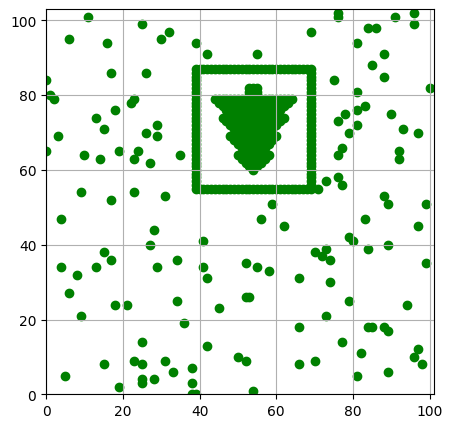

In [265]:
import matplotlib.pyplot as plt


xs = [x for x, y in new_pos]
ys = [y for x, y in new_pos]

plt.figure(figsize=(5,5))
plt.xlim(0, x_bound)
plt.ylim(0, y_bound)
plt.scatter(xs, ys, c='green')
plt.grid(True)
plt.show()


In [225]:
new_pos

[(94, 94),
 (41, 81),
 (46, 46),
 (89, 88),
 (22, 47),
 (13, 8),
 (38, 98),
 (12, 11),
 (2, 68),
 (78, 6),
 (94, 24),
 (20, 39),
 (71, 28),
 (10, 87),
 (87, 16),
 (38, 36),
 (44, 17),
 (74, 87),
 (6, 5),
 (86, 55),
 (37, 101),
 (43, 55),
 (94, 79),
 (16, 9),
 (6, 11),
 (96, 26),
 (9, 14),
 (15, 99),
 (20, 1),
 (68, 26),
 (75, 26),
 (50, 14),
 (63, 81),
 (6, 24),
 (29, 29),
 (40, 93),
 (41, 64),
 (42, 70),
 (15, 27),
 (6, 68),
 (59, 44),
 (39, 10),
 (92, 17),
 (3, 23),
 (28, 66),
 (81, 102),
 (7, 9),
 (88, 12),
 (43, 95),
 (74, 46),
 (80, 59),
 (94, 84),
 (47, 78),
 (83, 39),
 (58, 2),
 (88, 4),
 (46, 53),
 (83, 75),
 (45, 26),
 (53, 56),
 (25, 95),
 (15, 4),
 (22, 10),
 (68, 16),
 (12, 9),
 (54, 102),
 (38, 25),
 (7, 81),
 (2, 14),
 (31, 82),
 (22, 31),
 (76, 89),
 (23, 40),
 (86, 100),
 (92, 3),
 (9, 50),
 (45, 39),
 (59, 93),
 (26, 34),
 (53, 66),
 (16, 2),
 (85, 29),
 (25, 97),
 (15, 92),
 (68, 28),
 (61, 55),
 (7, 31),
 (100, 26),
 (26, 84),
 (90, 19),
 (65, 60),
 (64, 43),
 (7, 26

In [250]:
def contiguous_points(points):
    first = sorted(points, key=lambda x: (x[1], x[0]))
    second = sorted(points, key=lambda x: (x[0], x[1]))
    contiguous = 0
    for item in [first,second]:
        for i in range(1,len(item)):
            x,y = item[i]
            prevx, prevy = item[i-1]
            if (abs(x-prevx) + abs(y-prevy)) <= 2:
                contiguous += 1
    return contiguous

In [245]:
sorted(new_pos)

[(0, 28),
 (0, 74),
 (1, 23),
 (1, 24),
 (1, 81),
 (1, 85),
 (2, 18),
 (2, 44),
 (2, 46),
 (2, 79),
 (3, 22),
 (3, 22),
 (3, 46),
 (3, 48),
 (3, 52),
 (3, 98),
 (4, 24),
 (4, 31),
 (4, 32),
 (4, 55),
 (4, 61),
 (4, 66),
 (4, 94),
 (5, 19),
 (5, 22),
 (5, 30),
 (5, 58),
 (5, 65),
 (5, 76),
 (5, 83),
 (5, 89),
 (6, 3),
 (6, 34),
 (6, 45),
 (6, 45),
 (6, 75),
 (6, 77),
 (6, 89),
 (6, 90),
 (7, 36),
 (7, 69),
 (7, 81),
 (7, 82),
 (7, 97),
 (8, 0),
 (8, 9),
 (8, 36),
 (8, 40),
 (8, 54),
 (8, 64),
 (9, 27),
 (9, 58),
 (9, 76),
 (9, 82),
 (9, 91),
 (10, 7),
 (10, 24),
 (10, 27),
 (10, 61),
 (11, 13),
 (11, 25),
 (11, 41),
 (11, 45),
 (11, 63),
 (11, 97),
 (12, 33),
 (12, 53),
 (12, 69),
 (12, 70),
 (12, 95),
 (13, 11),
 (13, 59),
 (13, 71),
 (13, 85),
 (13, 90),
 (13, 93),
 (14, 22),
 (14, 22),
 (14, 41),
 (14, 46),
 (14, 70),
 (14, 77),
 (14, 93),
 (15, 1),
 (15, 15),
 (15, 41),
 (15, 48),
 (16, 22),
 (16, 82),
 (17, 47),
 (17, 56),
 (17, 59),
 (17, 74),
 (17, 86),
 (18, 6),
 (18, 29),
 (18,

In [230]:
def average_distance_to_line(points, point1=(0, 0), point2=(50, 100)):
    """
    Calculate the average perpendicular distance of a set of points from a specified line.

    Parameters:
    - points (list of tuples): List containing (x, y) coordinates of the points.
    - point1 (tuple): First point defining the line (default is (0, 0)).
    - point2 (tuple): Second point defining the line (default is (50, 100)).

    Returns:
    - float: The average distance of the points from the line.
    - pandas.DataFrame: DataFrame containing individual distances (optional).
    """
    # Convert points to NumPy array for vectorized operations
    data = np.array(points)  # Shape: (n_points, 2)

    # Unpack the points defining the line
    x1, y1 = point1
    x2, y2 = point2

    # Calculate the coefficients A, B, C for the line equation Ax + By + C = 0
    A = y2 - y1
    B = x1 - x2
    C = x2 * y1 - x1 * y2

    # Compute the denominator (constant for all points)
    denominator = np.sqrt(A**2 + B**2)

    # Calculate perpendicular distances using the formula
    # d = |A*x + B*y + C| / sqrt(A^2 + B^2)
    distances = np.abs(A * data[:, 0] + B * data[:, 1] + C) / denominator

    # Calculate the average distance
    average_distance = np.mean(distances)

    # (Optional) Create a DataFrame to return individual distances
    df = pd.DataFrame({
        'x': data[:, 0],
        'y': data[:, 1],
        'distance_to_line': distances
    })

    return average_distance


In [231]:
average_distance_to_line(new_pos, point1=(0, 0), point2=(50, 100))

30.452562571974138

In [ ]:
# Convert to NumPy array for efficient computation
data = np.array(points)

# Define the line coefficients
A = 100
B = -50
C = 0

# Calculate the denominator (constant for all points)
denominator = np.sqrt(A**2 + B**2)

# Compute distances
distances = np.abs(A * data[:, 0] + B * data[:, 1] + C) / denominator

# Create a DataFrame for better visualization
df = pd.DataFrame({
    'x': data[:, 0],
    'y': data[:, 1],
    'distance_to_line': distances
})

print(df)

In [172]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

In [266]:
data = np.array(new_pos)
# Initialize NearestNeighbors with n_neighbors=2
# n_neighbors=2 because the first neighbor is the point itself
nbrs = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(data)

# Find the nearest neighbors
distances, indices = nbrs.kneighbors(data)

# distances[:, 1] contains the distance to the nearest neighbor (excluding self)
nearest_distances = distances[:, 1]

# Calculate the average nearest neighbor distance
avg_nearest_distance = nearest_distances.mean()

In [267]:
avg_nearest_distance

1.93908983744824

In [268]:
new_pos

[(55, 66),
 (48, 79),
 (39, 68),
 (44, 79),
 (56, 87),
 (52, 74),
 (3, 69),
 (49, 72),
 (56, 76),
 (69, 78),
 (69, 67),
 (17, 52),
 (65, 87),
 (23, 63),
 (39, 84),
 (60, 69),
 (63, 79),
 (79, 70),
 (69, 97),
 (80, 41),
 (49, 75),
 (55, 74),
 (56, 63),
 (57, 75),
 (81, 76),
 (54, 61),
 (64, 79),
 (42, 13),
 (54, 65),
 (56, 67),
 (14, 63),
 (56, 47),
 (47, 78),
 (27, 62),
 (45, 79),
 (52, 26),
 (48, 72),
 (52, 77),
 (50, 55),
 (19, 65),
 (46, 74),
 (71, 55),
 (48, 55),
 (39, 70),
 (53, 68),
 (18, 24),
 (93, 71),
 (74, 30),
 (69, 75),
 (39, 59),
 (39, 85),
 (49, 73),
 (48, 76),
 (61, 73),
 (45, 78),
 (51, 76),
 (52, 66),
 (94, 24),
 (60, 78),
 (50, 72),
 (52, 75),
 (98, 8),
 (53, 79),
 (51, 78),
 (24, 65),
 (51, 68),
 (54, 78),
 (49, 78),
 (46, 87),
 (57, 74),
 (52, 63),
 (39, 66),
 (31, 53),
 (55, 34),
 (58, 55),
 (43, 87),
 (69, 82),
 (52, 73),
 (42, 31),
 (54, 1),
 (83, 77),
 (58, 33),
 (29, 69),
 (48, 87),
 (55, 71),
 (58, 70),
 (49, 76),
 (51, 72),
 (73, 21),
 (88, 53),
 (55, 79),
 (